<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/INPE_logo.png" align="left" style="height: 105px" height="105"/>
<!-- https://www.gov.br/mcti/pt-br/composicao/rede-mcti/instituto-nacional-de-pesquisas-espaciais -->
<img src="https://earth.bsc.es/harmonize/lib/exe/fetch.php?h=250&crop=0&tok=cfb750&media=wiki:logo.png" align="right" style="height: 90px" height="90"/>

<h1 style="color:#336699; text-align: center">Module eclimpr (climate data)</h1>
<h3 style="color:#336699; text-align: center"><b>E</b>ODCtHRS <b>Clim</b>ate <b>Pr</b>ocessing Package</h3>
<hr style="border:2px solid #0077b9;">

<div style="text-align: center; font-size: 90%;">
    <!-- <a href="https://colab.research.google.com/github/Harmonize-Brazil/code-gallery/blob/main/jupyter/events/2025-Infodengue-Harmonize_INPE/" target = "_blank"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"> </a> -->
    <a href="https://nbviewer.jupyter.org/github/Harmonize-Brazil/code-gallery/blob/main/jupyter/events/2025-Previous-Harmonize-Training/climate_temperature_indicator.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" ></a> <!--align="center"-->
    </br></br>
    Adeline Marinho Maciel <sup><a href="https://orcid.org/0000-0002-1467-6488" target="_blank" rel="noopener noreferrer"><img src="https://orcid.filecamp.com/static/thumbs/folders/qLJ1tuei4m6ugC3g.png" width="16" alt="ORCID iD" style="vertical-align: text-bottom;"/></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact:
    <a href="mailto:adeline.maciel@inpe.br">adelinemaciel22@gmail.com</a>
    <br/><br/>
    Last Update: November 6, 2025
    <br/><br/>
    <div style="width: 60%; margin: auto">
        <div style="text-align: center; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 10px;">
            This Jupyter Notebook uses the eclimpr package (cube4health module) and provides an overview of how to use it to generate climate indicators from a data source. It demonstrates how to process mean temperature data from the SAMeT product (CPTEC/INPE).
        </div>
    </div>
</div>
<br/><br/>

## <span style="color:#336699" id="intr"> Introduction </span>
<hr style="border:1px solid #0077b9;">

<p style='text-align: justify; font-size: 16px;'>
This Jupyter Notebook illustrates how to generate climate indicators from CPTEC/INPE and ERA5-Land/Copernicus datasets. This example demonstrates how these climate data can be integrated into the Earth Observation Data Cubes tuned for Health Response platform (EODCtHRS) component to produce climate indicators, enabling a more comprehensive analysis of environmental impacts on public health in Brazil.

The <a href="https://github.com/Harmonize-Brazil/eclimpr" target="_blank"><b>E</b>ODCtHRS <b>Clim</b>ate <b>Pr</b>ocessing Package (eclimpr)</a> is composed of a set of functions for reading files in NetCDF and GRIB2 formats, enabling spatial aggregations (e.g., grouping by municipalities) and temporal aggregations (e.g., epidemiological weeks and months).

As output, eclimpr generates files in both raster formats, in Cloud-Optimized GeoTIFF (COG), and vector formats, including GeoJSON and Shapefile. The input data includes daily aggregations of temperature, precipitation, relative humidity indicators derived from <a href="https://cds.climate.copernicus.eu/datasets/derived-era5-land-daily-statistics?tab=overview" target="_blank">ERA5-Land/Copernicus</a> (as pre-processed by Raphael Saldanha) and CPTEC/INPE.

<a href="#prococol_eclimpr">Figure 1</a> presents the data processing workflow.

</p>

<!-- https://www.base64-image.de/ -->
<figure style="text-align: center;">
  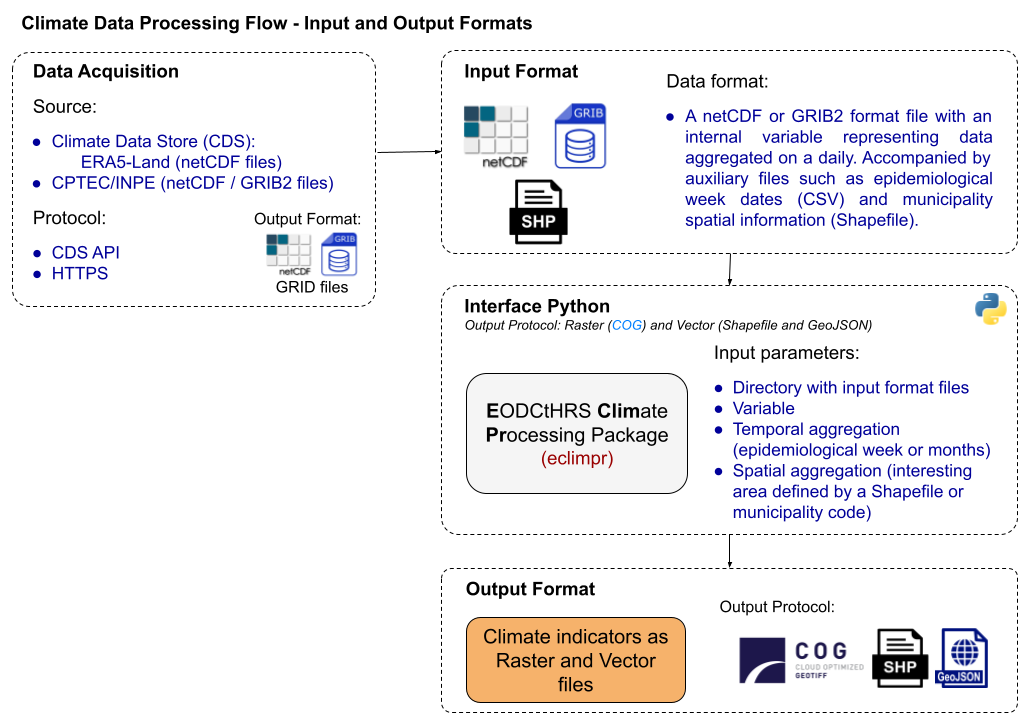
  <figcaption style='text-align: center;'><b>Figure 1</b> - Protocol climate data in eclimpr package.</figcaption>
</figure>

<p style='text-align: justify; font-size: 16px;'>
The third collection of climate data is based on a dataset produced by <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html" target="_blank">Raphael Saldanha</a>, who generated daily aggregates of selected ERA5-Land indicators for the Latin America region, in NetCDF format. For the Harmonize project, the selected data period covers from January 2010 to August 2025 for two regions of interest: Lower Tocantins River Basin (north) and Semi-arid areas of Campina Grande/Patos (northeast). The list was defined by the team of Fiocruz experts involved in the project and serves as a reference for the set of indicators detailed below in <a href="#climate_indicators_table">Table 1</a>.

In addition to these data, the collection also includes indicators from Center for Weather Forecast and Climate Studies (CPTEC/INPE), such as temperature from <a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/" target="_blank">SAMeT</a> product and precipitation from <a href="https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/" target="_blank">MERGE</a> product, expanding the range of variables and ensuring a comprehensive climate characterization for the regions of interest.
</p>

<table id="climate_indicators_table" align="center">
    <caption style="text-align"><b>Table 1</b> - List of climate indicators </caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th>Indicator description (unit)</th>
        <th>Aggregation Temporal / Spatial</th>
        <th>Period / Frequency</th>
        <th>Data source</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td <p style="text-align: center; font-size: 16px;">
                <b>Temperature</b> values for maximum, minimum and mean in Celsius (°C) (converts temperature values from Kelvin to Celsius using the transformation value - 273.15)
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>2m temperature</i>)
            </td>
        </tr>
        <tr style="background-color: #D8D8D8; font-size: 16px; color: #000;">
            <td <p style="text-align: center; font-size: 16px;">
                <b>Precipitation</b> values for maximum, minimum and mean rainfall accumulation, measured in millimeters (mm) (converts values from meters to millimeters using the transformation value * 1000)
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>total precipitation</i>)
            </td>
        </tr>
        <tr>
            <td <p style="text-align: center; font-size: 16px;">
                <b>Relative Humidity (%)</b> calculated from ERA5-Land data using 2m temperature and 2m dewpoint temperature.
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>2m temperature</i> and <i>2m dewpoint temperature</i>)
            </td>
        </tr>
        <tr style="background-color: #D8D8D8; font-size: 16px; color: #000;">
            <td <p style="text-align: center; font-size: 16px;">
                <b>Maximum temperature anomaly</b> (in number of consecutive days)
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Maximum Temperature of the Climatological Normal - Period: 1991-2020, (<a href="https://portal.inmet.gov.br/normais">INMET</a>) and ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>2m temperature</i>)
            </td>
        </tr>
        <tr>
            <td <p style="text-align: center; font-size: 16px;">
                <b>Temperature</b> values for maximum, minimum and mean in Celsius (°C) from SAMeT product CPTEC/INPE.
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Daily data from <a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/">SAMeT - CPTEC/INPE</a>
            </td>
        </tr>
        <tr style="background-color: #D8D8D8; font-size: 16px; color: #000;">
            <td <p style="text-align: center; font-size: 16px;">
                <b>Precipitation</b> values for maximum, minimum and mean rainfall accumulation, measured in millimeters (mm) from MERGE product CPTEC/INPE.
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Daily data from <a href="https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/">MERGE - CPTEC/INPE</a>
            </td>
        </tr>
    </tbody>
</table>


## <span style="color:#336699" id="install"> Example of using eclimpr to generate climate indicator </span>
<hr style="border:1px solid #0077b9;">

<p style='text-align: justify; font-size: 16px;'>
   The indicator used in this example represents the mean regional temperature derived from SAMeT data provided by CPTEC/INPE. The notebook demonstrates how to process a NetCDF file to generate municipal and monthly outputs in both vector formats (GeoJSON and Shapefile) and raster format (COG). The structure of the example package is outlined below:
</p>

<ol>
    <li> <a href="#install" style="font-size: 16px;">Installation cube4health Python Package</a>
    <li> <a href="#download" style="font-size: 16px;">Download datasets</a>
    <ol style='list-style-type: none;'>
        <li> 
            <a href="#images" style="font-size: 16px;">
                <span style="color:#fff">2.1.</span> Climate dataset from respository
            </a>
        <li> <a href="#roi" style="font-size: 16px;"><span style="color:#fff">2.2.</span> Create a region of interesting (roi)</a>
    </ol>
    <li> <a href="#execute" style="font-size: 16px;">Generate temperature indicator by month</a>
    <li> <a href="#results" style="font-size: 16px;">Plot results</a>
    <li> <a href="#references" style="font-size: 16px;">Bibliographical references</a>
</ol>

### <span style="color:#336699" id="install"> 1. Installation cube4health Python Package </span>
<hr style="border:1px solid #0077b9;">

1. At the terminal clone repository:
   
   ```git clone https://github.com/Harmonize-Brazil/cube4health.git```
   
2. Create a conda environment with Python 3.10 (requirement for the cube4health):

   ```conda create -n py310 python=3.10 -y```

3. Activate conda environment with Python 3.10:

   ```conda activate py310```
   
4. Use this conda environment to create a Python environment:

   ```python -m venv venv```

5. Deactivate the conda environment:

   ```conda deactivate```
   
6. Activate the new environment:

   ```source venv/bin/activate```

7. Install the *cube4health* using a custom setup for GDAL bindings:
   Go to the source code folder and install:

   ```cd cube4health```

   ```./setup_env.sh```

8. (**Optional**) Add the virtual environment with the *cube4health* to Jupyter:

   ```pip3 install ipykernel```
   
   ```python -m ipykernel install --user --name=venv_cube4health```

#### <span style="color:#336699"> Install and load cube4health </span>
 </span>
<hr style="border:1px solid #0077b9;">

To run the examples in this Jupyter Notebook, you need to install the <a href="https://github.com/Harmonize-Brazil/cube4health/tree/b-0.3.0" target="_blank">cube4health</a> Python package, using the development branch b-0.3.0, which includes the eclimpr module. To install it from GitHub using pip, use the following command:

In [3]:
# Check and install eclimpr if necessary
try:
    import cube4health
except ImportError:
    print("Must be installed!")

print(cube4health.__file__)

/home/jovyan/cube4health/src/cube4health/__init__.py


Installing additional libraries for processing and visualization:

### <span style="color:#336699" id="download"> 2. Download datasets </span>
 </span>
<hr style="border:1px solid #0077b9;">

To process a climate indicator using the eclimpr module, two main inputs are required: the climate data files themselves, provided in NetCDF or GRIB format, and a region of interest (ROI) that defines the spatial extent for which the indicators will be generated.

#### <span style="color:#336699" id="images"> 2.1 Climate dataset from respository</span>
 </span>
<hr style="border:1px solid #0077b9;">

You should download the data from a data source CPTEC/INPE or another. For instance, for mean temperature data produced by the <a href="#CPTEC/INPE">CPTEC/INPE</a> with <a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/DAILY/"> daily aggregates</a> from the SAMeT product, we use the function <i>get_data_ftp_cptec</i> and provide the following parameters (Table 2):

<table id="spatialize_data_parameters" align="center" width="100%">
    <caption style="text-align"><b>Table 2</b> - Parameter for <b>get_data_ftp_cptec</b> function</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th style="text-align: center;" width="15%"> Parameter
        <th style="text-align: center;" width="75%"> Description
        <th style="text-align: center;" width="10%"> Required
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> output_dir </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the directory path where the files NetCDF, .nc, will be stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> folder_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and indicates the new name of the folder that will be created where the downloaded data will be stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> product </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string that indicates the product name ("SAMeT" or "MERGE"). </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> period </p>
        <td> <p style="text-align: center; font-size: 16px;">  This is a list os string and indicates the list with start and end dates in format ["YYYY-MM-DD", "YYYY-MM-DD"]. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> aggregation </p>
        <td> <p style="text-align: center; font-size: 16px;">  This is a list of strings and indicates the list of aggregations for SAMeT ("max", "min", "mean", or "all") for "TMAX", "TMIN" and "TMED" data. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
</table>

In [4]:
from cube4health.eclimpr.download_cptec_ftp_data import get_data_ftp_cptec

Now, download the data from the CPTEC/INPE repository (https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/DAILY/TMED/2025/) for the months of March and April 2025.

In [6]:
# Download SAMeT data:
outputdir = "samet-data"
foldername = "temperature"
prod = "SAMeT"
agg = "mean" #["max", "min", "mean"] or "all"

get_data_ftp_cptec(output_dir=outputdir,
                   folder_name=foldername,
                   product=prod,
                   period=["2025-03-01", "2025-04-30"], 
                   aggregation=agg
                   )


--- Starting download data ...


SAMeT:

- TMED:


- Downloading SAMeT_CPTEC_TMED_20250301.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250302.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250303.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250304.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250305.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250306.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250307.nc:   0%|          | 0.00/1.65M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250308.nc:   0%|          | 0.00/1.65M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_20250309.nc:   0%|          | 0.00/1.65M [00:00<?, ?B/s]
                                                                                       
- Downloading SAMeT_CPTEC_TMED_20250310.nc:   0%|          | 0.00/1.64M [00:00<?, ?B/s]
- Downloading SAMeT_CPTEC_TMED_2


Saved log file in samet-data/temperature_1/temperature_20251107.log

... Done!



Example of the files downloaded into the specified directory, showing the daily NetCDF mean temperature products retrieved from the CPTEC/INPE SAMeT dataset.

![Output: samet_data](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/netcdf_files_list.png)

Using <b>gdalinfo</b>, it is possible to inspect the file metadata, including the image properties and the specific variable name `tmed` that must be defined in the next processing steps.

![Output: samet_data](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/netcdf_gdalinfo.png)

#### <span style="color:#336699" id="roi"> 2.2. Create a region of interesting (roi)</span>
 </span>
<hr style="border:1px solid #0077b9;">

Before proceeding to the climate indicator generation step, it must provide a region of interest (roi) for which the indicators will be produced. The eclimpr module offers two options. The first is to supply a user-provided shapefile and map its column names according to the requirements of the function. The second option is to specify a municipality code following the official IBGE identifier scheme.

### Providing your own shapefile.

In this case, set `own_shapefile=True` and supply the path to the file using shapefile_path. You must also provide a mapping of the attribute names in the original shapefile to the standardized names expected by the function through the `list_columns` argument. This mapping must include the keys `{"code_muni", "name_muni", "uf_state", "geometry"}` so that the data can be properly standardized. 

The function will then process the file, transform the geometry to EPSG:4326, rename the attributes, and save a processed version in the specified directory (Table 3).

<table id="process_shapefile_parameters" align="center" width="100%">
    <caption style="text-align:center"><b>Table 3</b> - Parameters for <b>processed_shapefile</b> function</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em; font-size: 16px; color: white;">
        <th style="text-align: center;" width="15%">Parameter</th>
        <th style="text-align: center;" width="75%">Description</th>
        <th style="text-align: center;" width="10%">Required</th>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">main_dir</p></td>
        <td><p style="text-align: center; font-size: 16px;">Directory where the processed shapefile will be stored.</p></td>
        <td><p style="text-align: center; font-size: 16px;">Yes</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">own_shapefile</p></td>
        <td><p style="text-align: center; font-size: 16px;">If False, data is loaded from geobr (default). If True, a user-provided shapefile is used.</p></td>
        <td><p style="text-align: center; font-size: 16px;">No</p></td>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">shapefile_path</p></td>
        <td><p style="text-align: center; font-size: 16px;">Path to the user-provided shapefile (required when own_shapefile=True).</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">list_columns</p></td>
        <td><p style="text-align: center; font-size: 16px;">Mapping of column names in the user-provided shapefile to the expected ones. Must include the keys {"code_muni","name_muni","uf_state","geometry"}. Example: {"code_muni": "CD_MUN", "name_muni": "NM_MUN", "uf_state": "SIGLA", "geometry": "geometry"}.</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">cod_mun</p></td>
        <td><p style="text-align: center; font-size: 16px;">7-digit IBGE municipality code (used when loading a single municipality from geobr). Required if own_shapefile=False and geobr_scope="municipality".</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">uf_name</p></td>
        <td><p style="text-align: center; font-size: 16px;">Two-letter state code (e.g., "RJ", "RN"). Required when own_shapefile=False and geobr_scope="state".</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">geobr_scope</p></td>
        <td><p style="text-align: center; font-size: 16px;">Scope for geobr download. Use "municipality" to load a single municipality by code, or "state" to load all municipalities of a state. Default is "municipality".</p></td>
        <td><p style="text-align: center; font-size: 16px;">No</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">geobr_year</p></td>
        <td><p style="text-align: center; font-size: 16px;">Reference year for geobr data. Default is 2022.</p></td>
        <td><p style="text-align: center; font-size: 16px;">No</p></td>
    </tr>
</table>


As follows, the original shapefile without modification. It is possible to see the features that will be mapped.

In [7]:
%pwd

'/home/jovyan/Desktop/code-gallery/jupyter/events/2025-Preview-Harmonize-Training'

In [8]:
import geopandas as gpd

# Load shapefile
gdf = gpd.read_file("dataset/mun_indireto_PA.shp")

# Print first 4 rows
gdf.head(4)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,cod,geometry
0,1500107,Abaetetuba,PA,1610.654,NaN,"POLYGON ((-48.83139 -1.56352, -48.8291 -1.5710..."
1,1500800,Ananindeua,PA,190.581,NaN,"POLYGON ((-48.33466 -1.23983, -48.33379 -1.243..."
2,1501105,Bagre,PA,4397.321,NaN,"POLYGON ((-50.29255 -1.80634, -50.28356 -1.806..."
3,1501204,Baião,PA,3759.834,NaN,"POLYGON ((-49.48643 -2.66318, -49.43872 -2.663..."


Now, we use the function <i>processed_shapefile</i> which provides a new Shapefile and ensures a standardized format with four attributes: ``cod_mun`` (municipality code), ``name_mun`` (municipality name), ``uf_mun`` (state code), and ``geometry`` (EPSG:4326):

In [9]:
from cube4health.eclimpr.process_shapefile import processed_shapefile

In [10]:
# As a dictionary
mapping = {
    "code_muni": "CD_MUN",
    "name_muni": "NM_MUN",
    "uf_state": "SIGLA",
    "geometry": "geometry"
}

# From shapefile provided by user
processed_shapefile(
    main_dir="dataset/",
    own_shapefile=True,
    shapefile_path="dataset/mun_indireto_PA.shp", # original shapefile path
    list_columns=mapping
)


Created New Shapefile - Done


,cod_mun,name_mun,uf_mun,geometry
0,1500107,Abaetetuba,PA,"POLYGON ((-48.83139 -1.56352, -48.8291 -1.5710..."
1,1500800,Ananindeua,PA,"POLYGON ((-48.33466 -1.23983, -48.33379 -1.243..."
2,1501105,Bagre,PA,"POLYGON ((-50.29255 -1.80634, -50.28356 -1.806..."
3,1501204,Baião,PA,"POLYGON ((-49.48643 -2.66318, -49.43872 -2.663..."
4,1501303,Barcarena,PA,"POLYGON ((-48.4695 -1.59545, -48.46545 -1.6021..."
5,1501402,Belém,PA,"POLYGON ((-48.35304 -1.22103, -48.35754 -1.224..."
6,1501501,Benevides,PA,"POLYGON ((-48.33104 -1.25695, -48.33038 -1.257..."
7,1501782,Breu Branco,PA,"POLYGON ((-48.92561 -3.41294, -48.92396 -3.418..."
8,1502103,Cametá,PA,"POLYGON ((-49.40003 -1.92377, -49.39683 -1.925..."
9,1503093,Goianésia do Pará,PA,"POLYGON ((-49.16052 -3.53843, -49.15607 -3.539..."


The roi directory now contains the newly processed shapefile called `mun_indireto_PA_processed`, updated with the standardized columns `cod_mun`, `name_mun`, `uf_mun`, and `geometry` in EPSG:4326.

![Output: shp_output](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/roi_output.png)

### Shapefile directly from the geobr package.

When `own_shapefile=False`, the area of interest is obtained automatically from geobr. Two scopes are supported.

If `geobr_scope="municipality"`, you must provide a 7-digit IBGE municipality code through the cod_mun parameter, and only that municipality will be loaded.

If `geobr_scope="state"`, you must provide the state’s two-letter code using uf_name, and the function will load all municipalities of that state for the chosen reference year.

In both cases, the data are standardized to the same four attributes (cod_mun, name_mun, uf_mun, geometry) and transformed to EPSG:4326, ensuring consistency with the subsequent climate indicator processing workflow.

In [11]:
# From geobr package Python by state
processed_shapefile(main_dir="dataset/",
                    own_shapefile=False,
                    geobr_scope = "state",
                    uf_name="SE") # Sergipe-SE, Brazil

Created New Shapefile - Done


,cod_mun,name_mun,uf_mun,geometry
0,2800100,Amparo do São Francisco,SE,"MULTIPOLYGON (((-36.93469 -10.12066, -36.93995..."
1,2800209,Aquidabã,SE,"MULTIPOLYGON (((-37.05752 -10.18106, -37.15047..."
2,2800308,Aracaju,SE,"MULTIPOLYGON (((-37.03462 -10.9573, -37.03908 ..."
3,2800407,Arauá,SE,"MULTIPOLYGON (((-37.66487 -11.33266, -37.67584..."
4,2800506,Areia Branca,SE,"MULTIPOLYGON (((-37.31644 -10.73676, -37.31128..."
...,...,...,...,...
70,2807204,Siriri,SE,"MULTIPOLYGON (((-37.07586 -10.63224, -37.07217..."
71,2807303,Telha,SE,"MULTIPOLYGON (((-36.86771 -10.2282, -36.86724 ..."
72,2807402,Tobias Barreto,SE,"MULTIPOLYGON (((-37.99847 -11.19422, -37.99729..."
73,2807501,Tomar do Geru,SE,"MULTIPOLYGON (((-37.79163 -11.34732, -37.7988 ..."


The roi directory now contains the newly processed shapefile called `geobr_SE_processed`, updated with the standardized columns `cod_mun`, `name_mun`, `uf_mun`, and `geometry` in EPSG:4326.

![Output: shp_output](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/roi_geobr_output.png)

### <span style="color:#336699" id="execute"> 3. Generate temperature indicator by month </span>
 </span>
<hr style="border:1px solid #0077b9;">

<p style="text-align: justify;  font-size: 16px;">
In this example, we will use the TMED data from SAMeT. We will perform spatial aggregation by municipality and temporal aggregation by month and epidemiological week for the regions of interest (ROI) of the HARMONIZE Project in Brazil — Northeast and North regions. To do this, it is necessary to specify each parameter and execute the function <i>process_climate_indicator</i>.
</p>

Before running the <i>process_climate_indicator</i> function, it is necessary to define the parameters that control the data processing workflow. These parameters determine the input and output directories, the variable to be processed, the region of interest shapefile, and the temporal configuration used for aggregation. Table 4 summarizes all the parameters required to execute the function properly, including their descriptions, accepted values, and whether they are required.

<table id="spatialize_data_parameters" align="center" width="100%">
    <caption style="text-align"><b>Table 4</b> - Parameter for <b>process_climate_indicator</b> function of eclimpr package.</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th style="text-align: center;" width="15%"> Parameter
        <th style="text-align: center;" width="75%"> Description
        <th style="text-align: center;" width="10%"> Required
    </tr>
        <td> <p style="text-align: center; font-size: 16px;"> type_indicator </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and informs the type of indicator will be processed.  Can be: "temp_era5land", "precip_era5land", "anomaly_era5land", "humidity_era5land", "temp_cptec", "precip_cptec". Default is "temp_era5land". </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> spatial_aggregation </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and indicates the temporal aggregation unit. Default is "epiweek". The list: "epiweek", "month" </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
        <td> <p style="text-align: center; font-size: 16px;"> main_dir </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and informs the directory path where the files NetCDF, .nc, are stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> output_dir </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and informs the directory where the indicators generated will be stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> folder_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and indicates the new name of the folder that will be created where the downloaded data will be stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> shapefile_path </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the Regions of Interest (ROI) with the path with Shapefile of the interesting area. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> variable_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the variable name NetCDF file. The parameter needs to be known beforehan. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> years </p>
        <td> <p style="text-align: center; font-size: 16px;">  This is a list or unique values, YEAR, that user want to generate indicators from data. In this case, only NetCDF files with this date will be processed, for instance, [2019, 2020, 2021] or [2022]. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> indicator_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the indicator name to add in output files (max 20 characters). Example: temp for temperature, precip for precipitation. Default is "temp", "precip", "anomaly" and "humidity"  </p>
        <td> <p style="text-align: center; font-size: 16px;"> No </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> color_png_file </p>
        <td> <p style="text-align: center; font-size: 16px;">  This is a string and informs a .TXT file containing columns with value ranges and an RGB color column to be used in the PNG generation process of the package. </p>
        <td> <p style="text-align: center; font-size: 16px;"> No </p>
    </tr>
        <tr>
        <td> <p style="text-align: center; font-size: 16px;"> aggregation_type </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the list of aggregations to compute ("max", "min", "mean", or "all"). Default is "all". </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> provide_interval </p>
        <td> <p style="text-align: center; font-size: 16px;">  If True, allows the user to provide a custom interval file. Default is False. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> interval_file_path </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the path to the custom interval file in TXT format, if provide_interval is True. Default is None. Case use a a temporal agregation different of epidemiological week. :<br> 
        <br>Year,WeekNumber,StartDate,EndDate
        <br>2018,01,31/12/2017,06/01/2018
        <br>2018,02,07/01/2018,13/01/2018
        <td> <p style="text-align: center; font-size: 16px;"> No </p>
    </tr>
</table>

To process a temperature indicator from SAMeT/INPE uses <i>process_climate_indicator</i> function, as follows:

### Generate indicators by month.

In [12]:
from cube4health.eclimpr.process_climate_indicator import process_climate_indicator

The ``process_climate_indicator`` function can be used to generate the climate indicator by a roi. This will return the data in a set of folder with the `<name indicator>_<statistical aggregation>_<study area>_<spatial aggregation>_<temporal aggregation>_<provider>`, as example `temp_mean_NO_mun_month_cptec`.

To generate indicators by months, it is only need to define the parameter `spatial_aggregation` as `month`. 

In [13]:
maindir = "samet-data/temperature/TMED"
outputdir = "samet-data/temperature"
roi = "dataset/mun_indireto_PA_processed.shp"

# Temperature by months
process_climate_indicator(
    type_indicator = "temp_cptec", 
    spatial_aggregation = "month",  
    main_dir = maindir,
    output_dir= outputdir,
    folder_name = "NO", # North region
    shapefile_path = roi,
    variable_name = "tmed",
    years = [2025], 
    aggregation_type= ["mean"]
)


--- Starting processing SAMeT/CPTEC temperature by month ...

Created climate output directory: samet-data/temperature/output_climate_dir
Shapefile CRS: EPSG:4326
Diretory: samet-data/temperature/TMED/NO

Creating a Cloud Optimized GeoTIFF (.tif) for each NetCDF day file...


Processing temperature NetCDF files:   0%|          | 0/61 [00:00<?, ?it/s]

Variables: ['tmed', 'nobs']


/home/jovyan/.conda/envs/py310/lib/python3.10/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(
Processing temperature NetCDF files: 100%|██████████| 61/61 [00:21<00:00,  2.86it/s]


... Done

Creating month folders ...

... Done


Creating a stack raster by each folder and study region ...



100%|██████████| 2/2 [00:00<00:00,  5.58it/s]


... Done


Generating specified aggregated values from each stack raster...



100%|██████████| 2/2 [00:00<00:00, 27.02it/s]


... Done


Moving raster .COG to specified aggregation folders...



100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


Copied samet-data/temperature/TMED/NO/temp_mean_NO_mun_month_cptec -> samet-data/temperature/output_climate_dir/temp_mean_NO_mun_month_cptec
... Done


Creating a Shapefiles directory ...




Processing Shapefiles: 2it [00:00,  4.63it/s]                       


... Created 2 Shapefiles. Done.

Copied samet-data/temperature/TMED/NO/temp_mean_NO_mun_month_cptec -> samet-data/temperature/output_climate_dir/temp_mean_NO_mun_month_cptec

... Done


Processing finished successfully!

-----------------------------------



After running the function shown above, the complete set of monthly climate indicators was generated. The output directory now contains, for each processed month, all resulting files: the municipality-level shapefiles with aggregated values, their compressed versions, the corresponding GeoJSON files, and the PNG and GeoTIFF (COG) images produced for visualization and distribution.

![Output: climate_month](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/climate_output_months.png)

### Generate indicators by epidemiological weeks.

In this case, to generate indicators by epidemiological weeks instead of by month, you only need to change the parameter `spatial_aggregation` to `epiweek`. The remaining parameters follow the same structure as in the previous example.

In [14]:
# Temperature by epidemiological weeks
process_climate_indicator(
    type_indicator = "temp_cptec", 
    spatial_aggregation = "epiweek", 
    main_dir = maindir,
    output_dir= outputdir,
    folder_name = "NO",
    shapefile_path = roi,
    variable_name = "tmed",
    years = [2025], 
    aggregation_type= ["mean"]
)


--- Starting processing SAMeT/CPTEC temperature by epidemiological week ...

Created climate output directory: samet-data/temperature/output_climate_dir
Shapefile CRS: EPSG:4326
Diretory: samet-data/temperature/TMED/NO_1

Creating a Cloud Optimized GeoTIFF (.tif) for each NetCDF day file...


Processing temperature NetCDF files:   0%|          | 0/61 [00:00<?, ?it/s]

Variables: ['tmed', 'nobs']


Processing temperature NetCDF files: 100%|██████████| 61/61 [00:11<00:00,  5.29it/s]


... Done

Creating epidemiological week folders ...

... Done


Creating a stack raster by each folder and study region ...



100%|██████████| 10/10 [00:00<00:00, 27.17it/s]


... Done


Generating specified aggregated values from each stack raster...



100%|██████████| 10/10 [00:00<00:00, 30.72it/s]


... Done


Moving raster .COG to specified aggregation folders...



100%|██████████| 10/10 [00:00<00:00, 11.33it/s]



Copied samet-data/temperature/TMED/NO_1/temp_mean_NO_mun_epiweek_cptec -> samet-data/temperature/output_climate_dir/temp_mean_NO_mun_epiweek_cptec
... Done


Creating a Shapefiles directory ...



Processing Shapefiles: 10it [00:02,  4.51it/s]                      


... Created 10 Shapefiles. Done.

Copied samet-data/temperature/TMED/NO_1/temp_mean_NO_mun_epiweek_cptec -> samet-data/temperature/output_climate_dir/temp_mean_NO_mun_epiweek_cptec

... Done


Processing finished successfully!

-----------------------------------



After running the function with the spatial aggregation set to epidemiological weeks, the full set of weekly climate indicators was generated. The output directory now includes, for each epidemiological week processed, all resulting files: the municipality-level shapefiles with aggregated values, their compressed versions, the corresponding GeoJSON files, and the PNG and GeoTIFF (COG) images produced for visualization and distribution.

![Output: climate_epiweek1](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/climate_output_epiweek1.png)

![Output: climate_epiweek2](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/climate_output_epiweek2.png)

Among the improvements introduced in this version, the standardization of attribute names for geometric features in Shapefile and GeoJSON files (for both health and climate data) stands out. This initiative was motivated by the feedback provided during the training held in June, which highlighted the lack of uniformity in attribute naming across datasets.

The new naming convention adopts clear and intuitive terms in English, facilitating data integration and analysis across different systems and research teams. Table 5 summarizes the standardized attribute names now applied to all vector data layers related to health and climate indicators.

<table id="vector_attributes_standard" align="center" width="100%">
    <caption style="text-align:center"><b>Table 5</b> - Standardized attribute names for vector data (Shapefile and GeoJSON)</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th style="text-align: center;" width="20%">Attribute</th>
        <th style="text-align: center;" width="80%">Description</th>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">cod_mun</td>
        <td style="text-align: center; font-size: 16px">Municipality code according to IBGE (7-digit code, where the first two digits represent the state code).</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">name_mun</td>
        <td style="text-align: center; font-size: 16px">Full name of the municipality.</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">uf_mun</td>
        <td style="text-align: center; font-size: 16px">Abbreviation of the federal unit (state) to which the municipality belongs.</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">data_source</td>
        <td style="text-align: center; font-size: 16px">Name of the data provider or source (e.g., SAMeT, CPTEC, ERA5-Land).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">name_indicator</td>
        <td style="text-align: center; font-size: 16px">Name of the indicator represented in the dataset (e.g., temperature, precipitation, humidity, anomaly).</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">epiweek_number / month_number</td>
        <td style="text-align: center; font-size: 16px">Epidemiological week number (for weekly aggregation) or month number (for monthly aggregation).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">epiweek_start_date / month_start_date</td>
        <td style="text-align: center; font-size: 16px">Start date of the epidemiological week or first day of the month corresponding to the data record.</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">time_agg</td>
        <td style="text-align: center; font-size: 16px">Temporal aggregation type (e.g., epidemiological week or month).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">spatial_agg</td>
        <td style="text-align: center; font-size: 16px">Spatial aggregation unit (e.g., municipality).</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">value</td>
        <td style="text-align: center; font-size: 16px">Indicator value, expressed in °C (temperature), mm (precipitation), % (relative humidity), or number of consecutive days (temperature anomaly).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">geom</td>
        <td style="text-align: center; font-size: 16px">Geometry column used in spatial databases (e.g., PostGIS) or geospatial libraries (e.g., GeoPandas).</td>
    </tr>
</table>

For month and epidemiological week indicators.

Note: In the Shapefile (.shp) format, the attribute names are limited to a maximum of 10 characters due to the dBase (.dbf) file structure. For this reason, some field names are shortened to ensure compatibility (for example, data_source becomes datasource, and name_indicator becomes indicator). This convention guarantees that the files can be correctly read by GIS software such as QGIS, GeoServer, and PostGIS.

In [15]:
import geopandas as gpd

# Load shapefile
gdf = gpd.read_file("samet-data/temperature/output_climate_dir/temp_mean_NO_mun_month_cptec/shapefiles/2025-03-01/temp_mean_NO_mun_month_20250301_20250331.shp")

# Print first 4 rows
gdf.head(4)

,cod_mun,name_mun,uf_mun,data_sourc,name_indic,month_numb,month_star,time_agg,spatial_ag,value,geometry
0,1500107,Abaetetuba,PA,SAMeT (CPTEC/INPE),temp_mean,3,2025-03-01,month,municipality,26.172377,"POLYGON ((-48.83139 -1.56352, -48.8291 -1.5710..."
1,1500800,Ananindeua,PA,SAMeT (CPTEC/INPE),temp_mean,3,2025-03-01,month,municipality,26.374641,"POLYGON ((-48.33466 -1.23983, -48.33379 -1.243..."
2,1501105,Bagre,PA,SAMeT (CPTEC/INPE),temp_mean,3,2025-03-01,month,municipality,26.122938,"POLYGON ((-50.29255 -1.80634, -50.28356 -1.806..."
3,1501204,Baião,PA,SAMeT (CPTEC/INPE),temp_mean,3,2025-03-01,month,municipality,26.245081,"POLYGON ((-49.48643 -2.66318, -49.43872 -2.663..."


In [16]:
import geopandas as gpd

# Load shapefile
gdf = gpd.read_file("samet-data/temperature/output_climate_dir/temp_mean_NO_mun_epiweek_cptec/shapefiles/2025-03-09/temp_mean_NO_mun_epiweek_20250309_20250315.geojson")

# Print first 4 rows
gdf.head(4)

,cod_mun,name_mun,uf_mun,data_source,name_indicator,epiweek_number,epiweek_start_date,time_agg,spatial_agg,value,geometry
0,1500107,Abaetetuba,PA,SAMeT (CPTEC/INPE),temp_mean,11,2025-03-09,epiweek,municipality,25.987200,"POLYGON ((-48.83139 -1.56352, -48.8291 -1.5710..."
1,1500800,Ananindeua,PA,SAMeT (CPTEC/INPE),temp_mean,11,2025-03-09,epiweek,municipality,26.102066,"POLYGON ((-48.33466 -1.23983, -48.33379 -1.243..."
2,1501105,Bagre,PA,SAMeT (CPTEC/INPE),temp_mean,11,2025-03-09,epiweek,municipality,26.023949,"POLYGON ((-50.29255 -1.80634, -50.28356 -1.806..."
3,1501204,Baião,PA,SAMeT (CPTEC/INPE),temp_mean,11,2025-03-09,epiweek,municipality,26.276020,"POLYGON ((-49.48643 -2.66318, -49.43872 -2.663..."


### <span id="results" style="color:#336699">4. Plot results</span>
<hr style="border:1px solid #0077b9;">

It is possible to plot the data of the dataset with the plot method. To images:

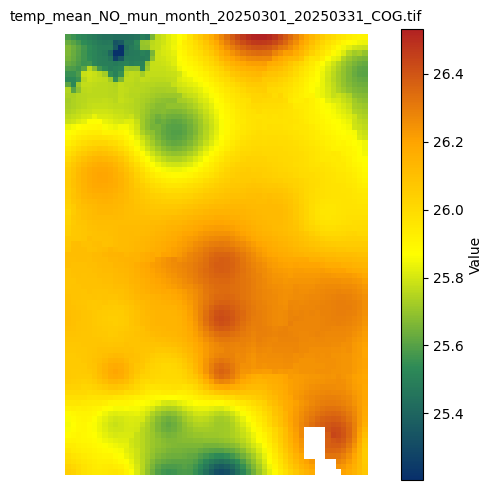

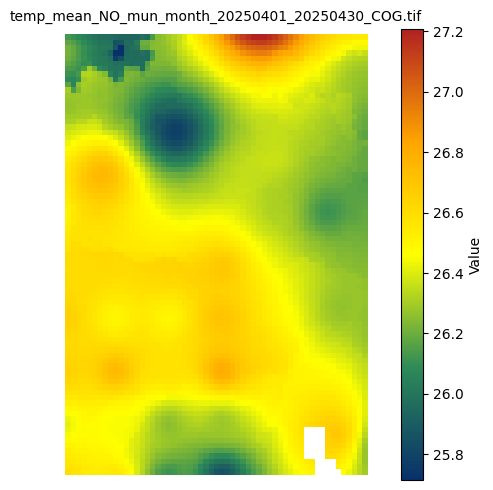

In [17]:
import os
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap: dark blue → green → yellow → orange → red
colors = ["#08306B", "#2E8B57", "#FFFF00", "#FFA500", "#B22222"]
custom_cmap = LinearSegmentedColormap.from_list("blue_green_yellow_orange_red", colors, N=256)

# Folder with rasters
path_tifs = "samet-data/temperature/output_climate_dir/temp_mean_NO_mun_month_cptec/images"

# Loop through TIFFs
for fname in sorted(os.listdir(path_tifs)):
    if fname.lower().endswith(".tif"):
        tif_path = os.path.join(path_tifs, fname)

        with rasterio.open(tif_path) as src:
            img = src.read(1)

        plt.figure(figsize=(6, 5))
        plt.imshow(img, cmap=custom_cmap)
        plt.colorbar(label="Value")
        plt.title(fname, fontsize=10)
        plt.axis("off")
        plt.tight_layout()
        plt.show()


To geojson files:

In [18]:
import folium
import glob
import os
import numpy as np
from branca.colormap import LinearColormap
import json

# Path with GeoJSONs
path_geojson_root = "samet-data/temperature/output_climate_dir/temp_mean_NO_mun_month_cptec/shapefiles"

# Get first GeoJSON
files = sorted(glob.glob(os.path.join(path_geojson_root, "**", "*.geojson"), recursive=True))
if not files:
    raise FileNotFoundError(f"No GeoJSON files under: {path_geojson_root}")

geojson = files[0]

# Map
m = folium.Map(location=[-2.242, -49.497], zoom_start=7)

# Read GeoJSON
with open(geojson, "r") as f:
    data = json.load(f)

# Extract values from value attribute
values = [feat["properties"].get("value") for feat in data["features"] if feat["properties"].get("value") is not None]
vmin, vmax = np.nanmin(values), np.nanmax(values)

# Color scale: dark blue → green → yellow → orange → red
cmap = LinearColormap(
    colors=["#08306B", "#2E8B57", "#FFFF00", "#FFA500", "#B22222"],
    vmin=vmin,
    vmax=vmax
)

# 
def style_fn(feature):
    val = feature["properties"].get("value")
    color = cmap(val) if val is not None else "#cccccc"
    return {
        "fillColor": color,
        "color": "#333",
        "weight": 0.5,
        "fillOpacity": 0.7,
    }

# GeoJSON colored
folium.GeoJson(
    data,
    style_function=style_fn,
    tooltip=folium.GeoJsonTooltip(fields=["name_mun", "value"], aliases=["Municipality:", "Value:"], localize=True)
).add_to(m)

# Add color bar
cmap.caption = "Temperature (°C)"
cmap.add_to(m)

m


### Docstring of function with description.

In [19]:
help(cube4health.eclimpr.process_climate_indicator)

Help on function process_climate_indicator in module cube4health.eclimpr.process_climate_indicator:

process_climate_indicator(main_dir, output_dir, folder_name, shapefile_path, variable_name, years, color_png_file=None, aggregation_type: Literal['max', 'min', 'mean', 'all'] = 'max', interval_file_path=None, provide_interval=False, type_indicator='temp_era5land', spatial_aggregation: Literal['epiweek', 'month'] = 'epiweek', **kwargs)
    Process climate indicators from ERA5-Land or CPTEC/INPE, by epidemiological week or by month.
    
    This is a facade that dispatches to the appropriate specialized function, keeping a single, user-friendly entry point.
    
    Parameters
    ----------
    main_dir : str
        Directory path where the source NetCDF/GRIB files are stored (input root). For most indicators, this should be a single folder containing the relevant files. For ``humidity_era5land``, however, two subfolders are required inside ``main_dir``: ``temperature``: must contain d

### <span id="references" style="color:#336699">5. Bibliographical references</span>
<hr style="border:1px solid #0077b9;">

<p id="ref_saldanha_2023" style='text-align: justify;'>Saldanha R, Xavier D, Pascoal V, Barros H, Gracie R, Magalhães M, Barcellos C (2023). ilis: An R package to calculate health indicators. <a href="https://github.com/rfsaldanha/bilis/.">https://github.com/rfsaldanha/bilis/</a>.</p>
                                                                                                              <p id="ref_saldanha_2023_2" style='text-align: justify;'>Saldanha R (2023). ERA5-Land selected indicators daily aggregates for Latin America. <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html">https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html</a>.</p>